# 1. Intro to Macro Data

First we need to load in some libraries, in particular:
- `numpy` and `pandas` for working with data
- `matplotlib` for plotting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This will make the graphs look better (optional).

In [29]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

Run this if you have an HD display (optional)

In [3]:
%config InlineBackend.figure_format = 'retina'

## Basic Plots

Here we plot the function $y = x \cdot (1-x)$

In [4]:
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
y = x*(1-x)
y

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

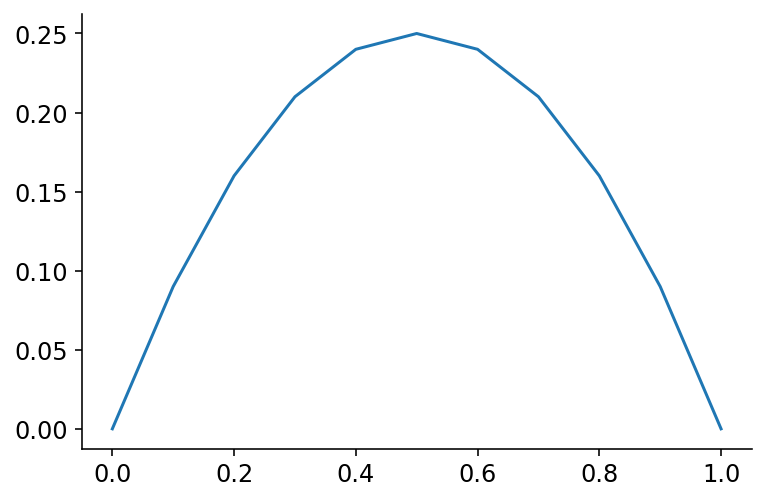

In [6]:
plt.plot(x, y);

## Loading Data

Let's load the real GDP series from FRED.

In [66]:
gdp = pd.read_excel('data/GDPCA.xls', index_col='Year')

Now we use the `pandas` plotting interface. This makes things easier.

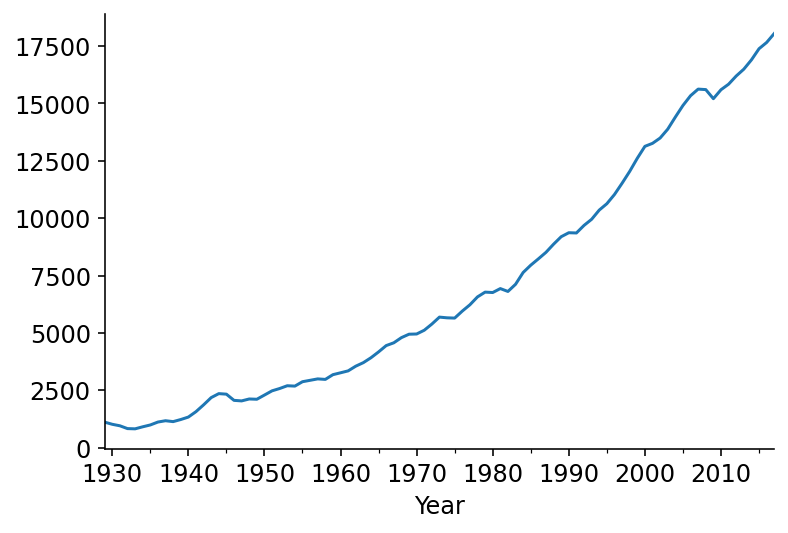

In [21]:
gdp['GDP'].plot();

We can look at the difference in log values to get the growth rate.

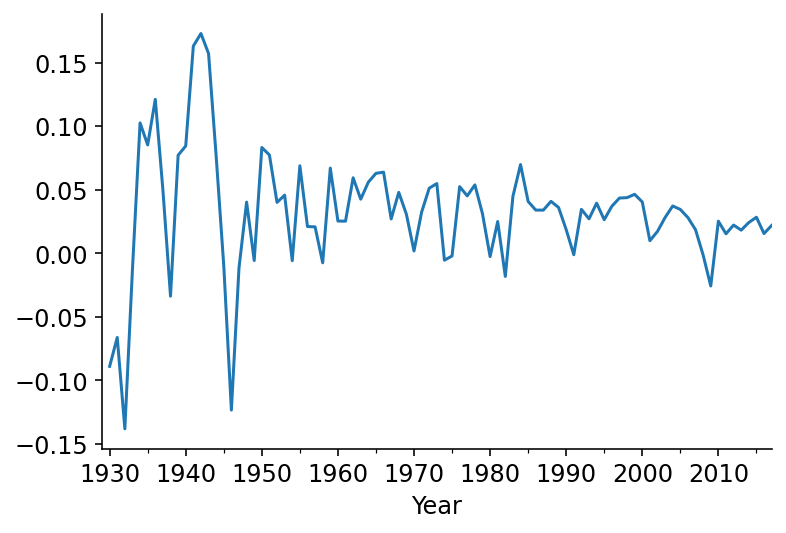

In [24]:
growth = np.log(gdp['GDP']).diff()
growth.plot();

## Maddison Project

Ok, now let's look a situation with multiple data series. In this case, we'll have real GDP for multiple countries over many years. This comes from the Maddison Project's regional data.

In [65]:
mpd0 = pd.read_excel('data/mpd2018_region_data.xlsx', sheet_name='Long data')

We need to get this in the right shape. Currently it's in "long" format, but we want "wide" format for plotting.

In [64]:
mpd = mpd0.pivot('year', 'region_name')['cgdppc']

Finally, we plot the data in logs to see growth rates

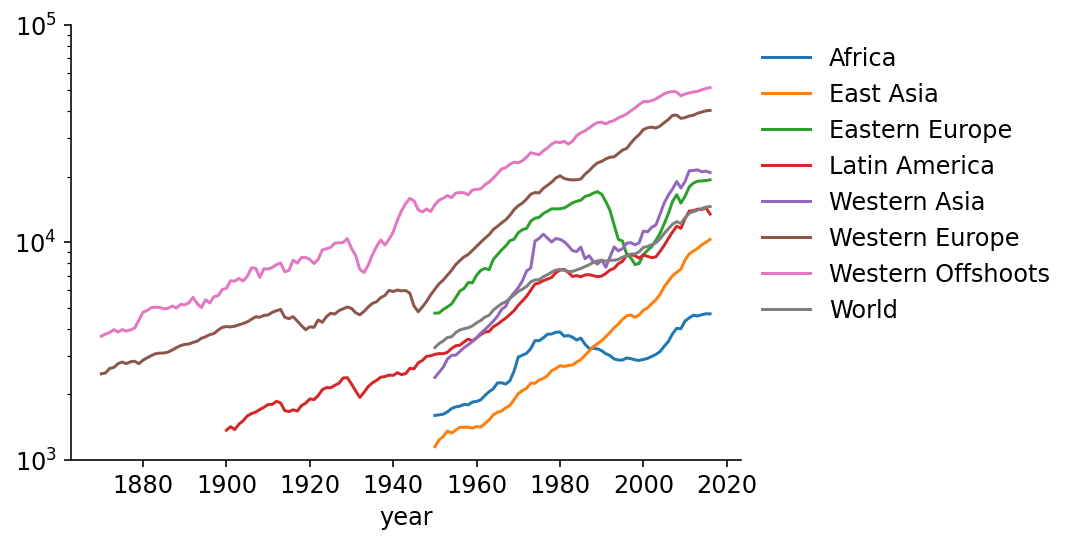

In [59]:
mpd.plot(logy=True, ylim=(1e3, 1e5));
plt.legend(bbox_to_anchor=(1, 1)); # this puts the legend on the right side

## Penn World Tables

We can take a similar approach with the latest Penn World Tables data

In [33]:
pwt0 = pd.read_excel('data/pwt100.xlsx', sheet_name='Data')
pwt = pwt0.pivot('year', 'countrycode')

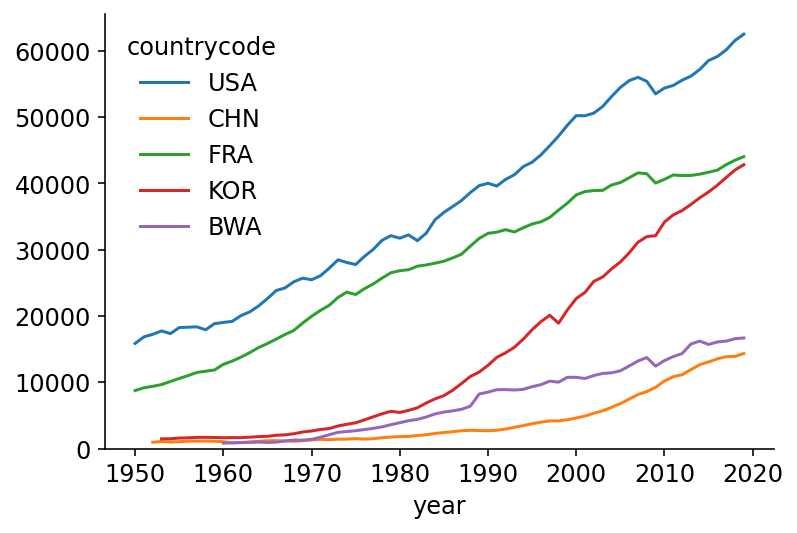

In [56]:
gdp_per = pwt['rgdpna']/pwt['pop']
gdp_per[['USA', 'CHN', 'FRA', 'KOR', 'BWA']].plot(ylim=(0, None));

We can also do things like plot the average hours worked across all countries over the years.

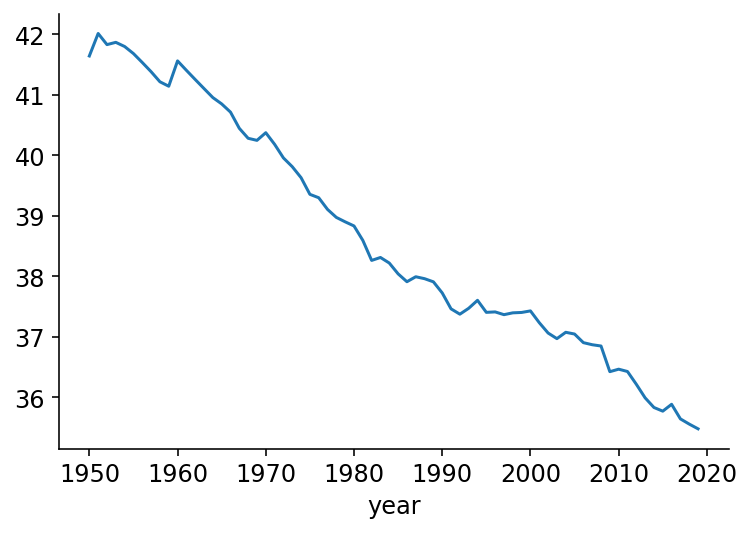

In [73]:
hrs_per_week = (7/365)*pwt['avh']
hrs_per_week.mean(axis=1).plot();